What is ordinary least square (OLS) method to obtain linear regressionmodel weights? See
https://en.wikipedia.org/wiki/Ordinary_least_squares
(https://en.wikipedia.org/wiki/Ordinary_least_squares)
. Can you implement this OLS method byPython to predict following dataset (
https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

The Ordinary Least Squares (OLS) method is commonly used technique to estimate the coefficients (weights) of a linear regression model. The main objective of OLS is to find the values of the coefficients that minimize the sum of squared residuals between the observed values and the predicted values from the linear model.

y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

x1,x2,.. are the independent variables
y  is traget variable, Beta's are the coefficient associate with each independent variable
Beta 0 is constant term, ε is error term.
The OLS method finds the values of the coefficients β₀, β₁, β₂, ..., βₙ that minimize the sum of squared residuals

We will implement this OLS method to the following dataset.(student_Scores.csv)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# import data
student_score = pd.read_csv('student_scores.csv')
student_score.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
display(student_score)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# check shape of data
student_score.shape

(25, 2)

In [10]:
# check null values
student_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [14]:
student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


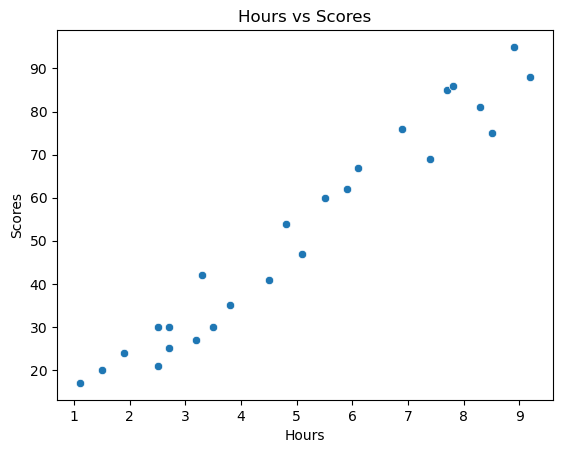

In [16]:
# visualise the relationship between hours and scores

sns.scatterplot(x='Hours', y='Scores', data=student_score)
plt.title('Hours vs Scores')
plt.show()

In [17]:
# splitting the data for modeling
# train test split

from sklearn.model_selection import train_test_split
X = student_score.iloc[:, :-1].values
y = student_score.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# writing OLS function  to get the coefficients
def OLS(X, y):
    X = np.c_[np.ones(X.shape[0]), X]
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# fitting the model
beta = OLS(X_train, y_train)
beta


array([2.01816004, 9.91065648])

In [22]:
# print the coefficients and the intercept
print(f'Coefficients: {beta[1]}')
print(f'Intercept: {beta[0]}')

Coefficients: 9.910656480642245
Intercept: 2.018160041434631


In [29]:
# making predictions
y_pred = beta[0] + beta[1] * X_test
y_pred


array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

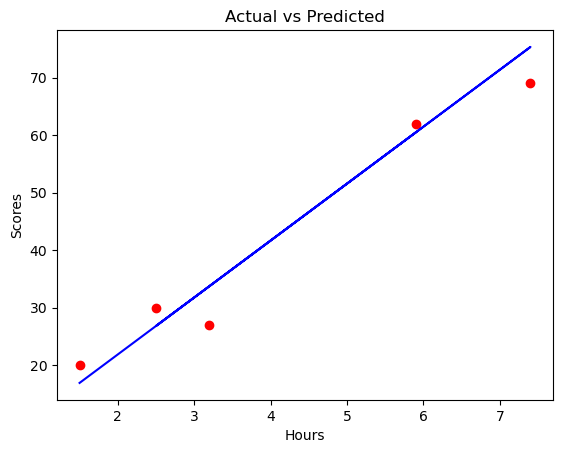

In [32]:
# visualise the predictions in comparison to the actual values 
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Hours') 
plt.ylabel('Scores')
plt.show()

In [34]:
# running the model for only X, y values
beta = OLS(X, y)
beta

array([2.48367341, 9.77580339])

In [35]:
# print the coefficients and the intercept
print(f'Coefficients: {beta[1]}')
print(f'Intercept: {beta[0]}')

Coefficients: 9.775803390787472
Intercept: 2.483673405373197


In [36]:
# The equation is Scores = 2.483673405373196 + 9.775803390787472 * Hours

# making predictions
y_pred1 = beta[0] + beta[1] * X
y_pred1


array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

In [43]:
# make y_pred1 in a dataframe
y_pred1 = pd.DataFrame(y_pred1, columns=['Predicted Scores'])
y_pred1




,Predicted Scores
0,26.923182
1,52.340271
2,33.766244
3,85.578002
4,36.698985
5,17.147378
6,92.421065
7,56.250592
8,83.622842
9,28.878343


In [44]:
# find the residuals
residuals = y - y_pred1['Predicted Scores']
residuals

0     -5.923182
1     -5.340271
2     -6.766244
3    -10.578002
4     -6.698985
5      2.852622
6     -4.421065
7      3.749408
8     -2.622842
9     -3.878343
10     7.242640
11     1.839087
12    -5.474789
13     7.256175
14     3.762943
15     5.511676
16     3.076818
17     2.942300
18     4.883926
19    -5.824618
20     1.121657
21     4.592470
22    -4.631726
23     6.063283
24     7.265060
Name: Predicted Scores, dtype: float64

In [45]:
# print R squared
def r_squared(y, y_pred):
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_res/ss_total)
    return r_squared

r_squared(y, y_pred1['Predicted Scores'])

0.9529481969048356

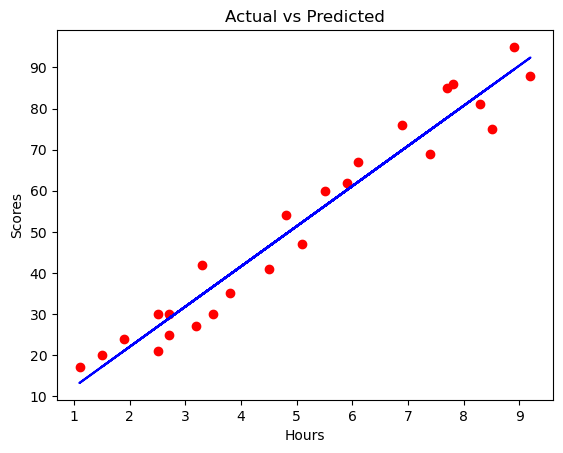

In [46]:
# visualise the data
plt.scatter(X, y, color='red')
plt.plot(X, y_pred1, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

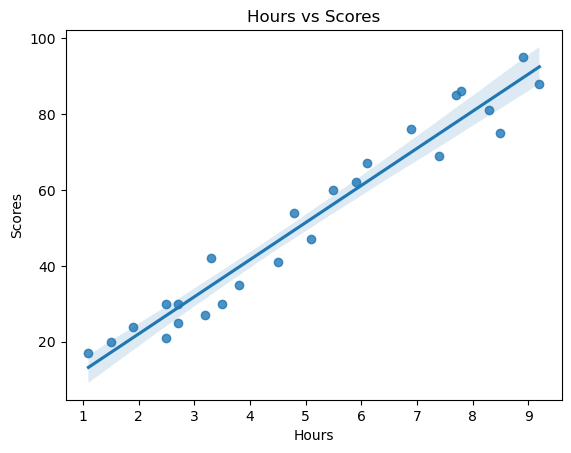

In [47]:
# fitting the ols regression line
sns.regplot(x='Hours', y='Scores', data=student_score)
plt.title('Hours vs Scores')
plt.show()


In [52]:
X = student_score.iloc[:, :-1].values
y = student_score.iloc[:, 1].values

In [53]:
# we can make use of OLS regression from statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Scores ~ Hours', data=student_score).fit()
print(model.params)

Intercept    2.483673
Hours        9.775803
dtype: float64


In [54]:
# print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 08 May 2024   Prob (F-statistic):           9.13e-17
Time:                        16:11:43   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

In [59]:
# the equation is Scores = 2.483673 + 9.775803 * Hours
# finding the residuals

residuals = model.resid
residuals


0     -5.923182
1     -5.340271
2     -6.766244
3    -10.578002
4     -6.698985
5      2.852622
6     -4.421065
7      3.749408
8     -2.622842
9     -3.878343
10     7.242640
11     1.839087
12    -5.474789
13     7.256175
14     3.762943
15     5.511676
16     3.076818
17     2.942300
18     4.883926
19    -5.824618
20     1.121657
21     4.592470
22    -4.631726
23     6.063283
24     7.265060
dtype: float64

R Squared

In [60]:
# print R squared
model.rsquared

0.9529481969048356

Mean Squared Error and Root Mean Squared Error

In [62]:
# Mean Squared Error and Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = model.mse_resid
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 31.394272292658112
Root Mean Squared Error: 5.6030591905367295


 Residual squared error

In [63]:
# residual squared error
residuals_se = residuals**2
residuals_se


0      35.084084
1      28.518491
2      45.782061
3     111.894131
4      44.876404
5       8.137449
6      19.545812
7      14.058060
8       6.879298
9      15.041541
10     52.455841
11      3.382239
12     29.973311
13     52.652082
14     14.159739
15     30.378577
16      9.466810
17      8.657130
18     23.852732
19     33.926181
20      1.258115
21     21.090784
22     21.452888
23     36.763403
24     52.781099
dtype: float64

In [64]:
# residual squared error

residuals_se = residuals**2
resid_sum_of_sq =sum(residuals_se) 
degrees_of_freedom = len(y) - 2
rse = np.sqrt(resid_sum_of_sq / degrees_of_freedom)
rse

5.6030591905367295

The difference between predicted scores  and observed scores is around 5.

Visualisation

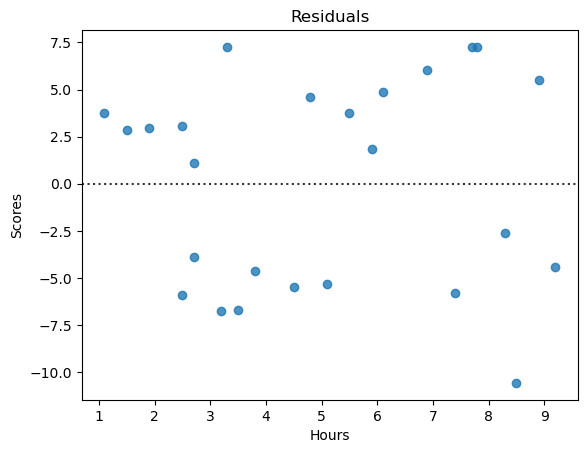

In [65]:
# VISUALISING THE RESIDUALS
sns.residplot(x='Hours', y='Scores', data=student_score)
plt.title('Residuals')
plt.show()

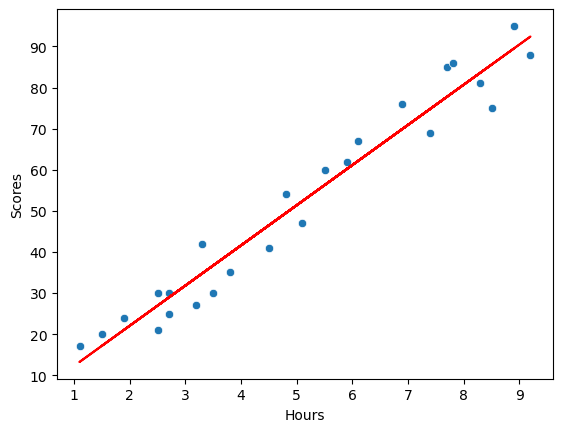

In [70]:
# fitting the ols regression line
sns.scatterplot(x='Hours', y='Scores', data=student_score)
x = student_score['Hours']
y = 2.483673 + 9.775803 * x
plt.plot(x, y, color='red')
plt.show()

Thanks!